In [1]:
from tqst_class import *

In [2]:
tomo = tQST(4)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal = np.zeros(N)
diagonal[0]=1/4
diagonal[3]=1/4
diagonal[12]=1/4
diagonal[15]=1/4
print(diagonal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 4.
4
[0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.
 0.   0.25]
Diagonal counts are now set.
The threshold is now set to 0.05.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+
nb of measurement necessary:  (12,)


1. dare i veri valori della diagonale

In [3]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_18Dic_Diag_Diego'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_18788\1622628163.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_18Dic_Diag_Diego'


Loading...  \Tomo_18Dic_Diag_Diego
Sorted Binary Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
Original Indexes: [0, 8, 12, 4, 1, 9, 13, 5, 2, 10, 14, 6, 3, 11, 15, 7]
original coinc: [' 276.0' ' 0.0' ' 2.0' ' 214.0' ' 157.0' ' 0.0' ' 0.0' ' 162.0' ' 0.0'
 ' 0.0' ' 0.0' ' 5.0' ' 1.0' ' 7.0' ' 1.0' ' 0.0']
diag_coinc, ordered: [' 276.0' ' 0.0' ' 1.0' ' 157.0' ' 0.0' ' 0.0' ' 7.0' ' 0.0' ' 2.0' ' 0.0'
 ' 1.0' ' 0.0' ' 214.0' ' 5.0' ' 0.0' ' 162.0']
Type time-bin, ordered: [' 00' ' 00' ' 00' ' 00' ' 01' ' 01' ' 01' ' 01' ' 10' ' 10' ' 10' ' 10'
 ' 11' ' 11' ' 11' ' 11']
Type freq-bin, ordered: [' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11'
 ' 00' ' 01' ' 10' ' 11']


In [88]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
# threshold = tomo.set_threshold(gini)
threshold=0.1

offd_projs = tomo.get_projs_to_measure()

These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 6, 'r')   |   |HDDH>  |
|  (0, 6, 'i')   |   |HDRH>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+


2. dare i counts misurati per ciascun proiettore (ancora ideali)

In [4]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_18Dic_all_Diego'
fpath=DIR+folder+filename

### Proj, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=np.deg2rad(settings_FB)
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_18Dic_all_Diego
['HHDD' 'HHDR' 'DDHH' 'DRHH' 'DDDD' 'DDDR' 'DRDR' 'DRDD' 'VVDD' 'VVDR'
 'DDVV' 'DRVV']
[ 50.  20. 982. 544. 238.  77.  50. 152.  55.  18. 521. 472.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_18788\403694457.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_18Dic_all_Diego'


(28, 16)
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


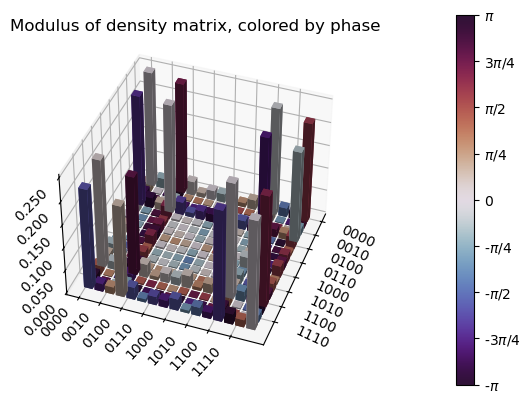

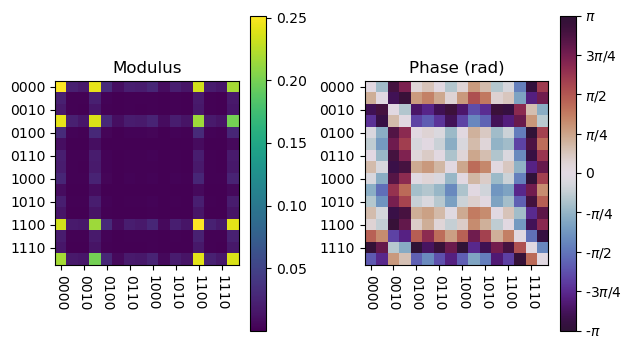

In [5]:
# coinc_arr.transpose()
# proj_name.transpose()

tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


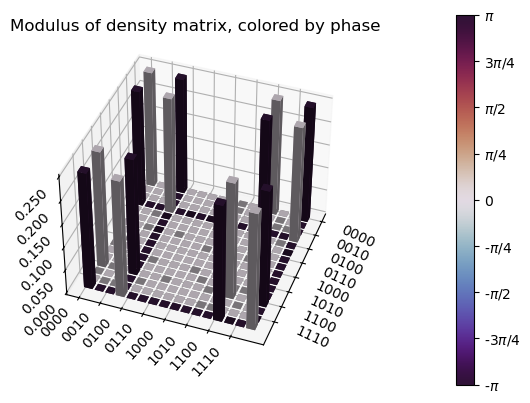

0.7343990961208343
0.9999999039206914


In [21]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/2
psi_true[3]=-1/2
psi_true[12]=1/2
psi_true[15]=-1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

3. Now let's set our real projectors...

TO be considered:
- losses (to implement)
- post selection factors


In [16]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J0, J1, J_1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(-theta*1.0j)
    W[1,0] = J_1*np.exp(theta*1.0j)

    return W

def W_fb_si_func(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
    W_s=W_fb_func(J0_s, J1_s, J_1_s, ph_s)
    W_i=W_fb_func(J0_i, J1_i, J_1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W


In [13]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.42732558, 1.20348837, 1.2005814, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.42732558e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [7.36924090e-17+1.20348837j 1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.20058140e+00+0.j         0.00000000e+00+0.j
  1.42732558e+00+0.j         0.00000000e+00+0.j        ]
 [6.12323400e-17+1.j         1.20058140e+00+0.j
  7.36924090e-17+1.20348837j 1.42732558e+00+0.j        ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e+00+0.j         1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e

In [19]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])
NbProj=len(offd_projs)
base = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj+N,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj+N])

C_arr=np.array([1.42732558, 1.20348837, 1.2005814,  1.])
Ctot=np.sum(C_arr)
# C_arr=C_arr/Ctot*2

for i in range(N):
    ## DIAG, is measured with thelong arm of the MZI close, 
    # so no norm is needed. The phi-mod are also off (@output)

    Coinc_exp[i]=diag_coinc_arr[i]
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the basis, the modulator is always OFF
    J0=1.0
    J1=0.0
    J_1=0.0

    ## TB
    Css=C_arr[0]
    Csl=0
    Cls=0
    Cll=0

    ## for each projector, define the matrix Wexp with the correct parameters
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J0,J1,J_1,0.0,J0,J1,J_1,0.0)
    # print(W_fb_si)
    Wexp=np.kron(W_tb_si,W_fb_si)
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp.T
    Proj_exp[i,:]=np.matmul(base[i,:].T,Wexp_2)
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj daig: ', Proj_exp[i,:])
   
print('Coinc diag: ', Coinc_exp)

for p in range(len(proj_name)):

    Css=1.42732558
    Csl=1.20348837
    Cls=1.2005814
    Cll=1.0

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV'
    if type_TB[p]==' ll':
        string_TB='HH'

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]=='01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'
    
    if proj_name[p][2:4]=='DD' or proj_name[p][2:4]=='DR' or proj_name[p][2:4]=='RD' or proj_name[p][2:4]=='RR':
        # print('superposition :', proj_name[p][2:4])
        J0=1.0
        J1=1.5
        J_1=0.5
    else:
        # print('not superposition :', proj_name[p][2:4])
        J0=1.0
        J1=0.0
        J_1=0.0

    if proj_name[p][0:2]=='DD' or proj_name[p][0:2]=='DR' or proj_name[p][0:2]=='RD' or proj_name[p][0:2]=='RR':
        # print('superposition tb :', proj_name[p][2:4])
        Css=C_arr[0]
        Csl=C_arr[1]
        Cls=C_arr[2]
        Cll=C_arr[3]
        # string_TB='HH'
    elif proj_name[p][0:2]=='HH':
        # print('not superposition tb :', proj_name[p][2:4])
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
        # string_TB='HH'
    elif proj_name[p][0:2]=='VV':
        # print('not superposition tb :', proj_name[p][2:4])
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
        # string_TB='VV'


    pr=p+N
    print(p)
    print(pr)
    base[pr,:]=prj.extended_projector_from_string(string_TB+string_FB)
    print('Base: ', string_TB+string_FB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    if settings_TB[3,p]==-1.0:
        settings_TB[3,p]=0.0

    
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p])
    print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p])
    print((J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p]))
    # print(W_fb_si)
    Wexp=np.kron(W_tb_si,W_fb_si)
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p]
    Proj_exp[pr,:]=np.dot(base[pr,:].T,Wexp_2)
    print('Exp proj: ', Proj_exp[pr,:])

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)

# Proj_exp_2=np.outer(Proj_exp,Proj_exp)
## shoud I do the same also for the diagonal elements ??? 

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [1.42732558+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 1.42732558+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 0.        +0.j 1.42732558+0.j 0.        +0.j
 0

The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


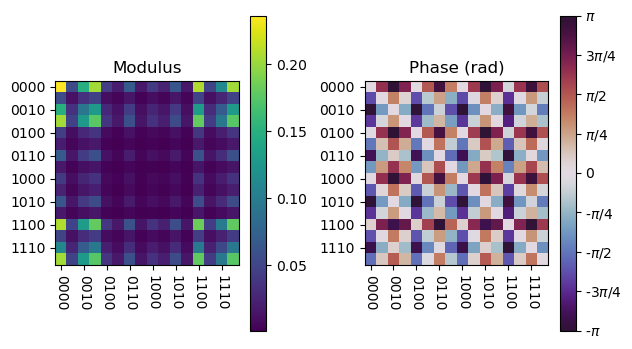

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


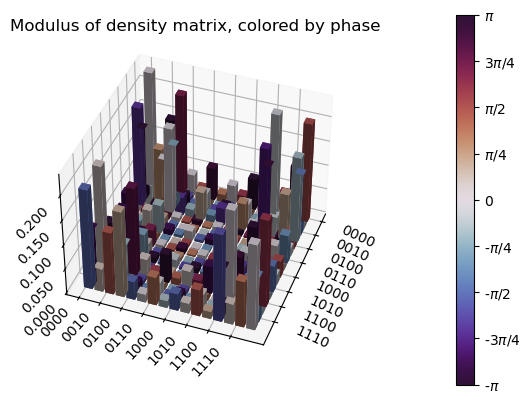

Fidelity:  0.7343990961208343
Purity:  0.9999999039206914


In [22]:
# tomo.set_projs_and_counts(proj_name, coinc_arr)
# projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
# print(projs)
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)

f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)